In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [48]:
df = pd.read_csv('C:/Users/niles/OneDrive/Desktop/BE(CS)/ML/DATA_SET/diabetes.csv')

In [49]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [50]:
df.shape

(768, 9)

In [51]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [52]:
x.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [53]:
set(x.dtypes)

{dtype('int64'), dtype('float64')}

In [54]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [55]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [56]:
x_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state= 42)

In [58]:
print(x_train.shape)
print(x_test.shape)

(576, 8)
(192, 8)


In [59]:
x.shape

(768, 8)

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(x_train,y_train) 

In [61]:
y_pred = knn.predict(x_test)

In [62]:
result = pd.DataFrame()
result['Actual'], result['Predicted'] = y_test,y_pred
result.sample(5)

,Actual,Predicted
731,1,0
544,0,0
336,0,1
136,0,0
211,0,0


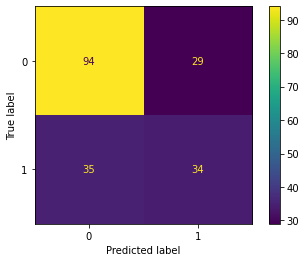

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       123
           1       0.54      0.49      0.52        69

    accuracy                           0.67       192
   macro avg       0.63      0.63      0.63       192
weighted avg       0.66      0.67      0.66       192



In [65]:
score = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    score.append(knn.score(x_test,y_test))

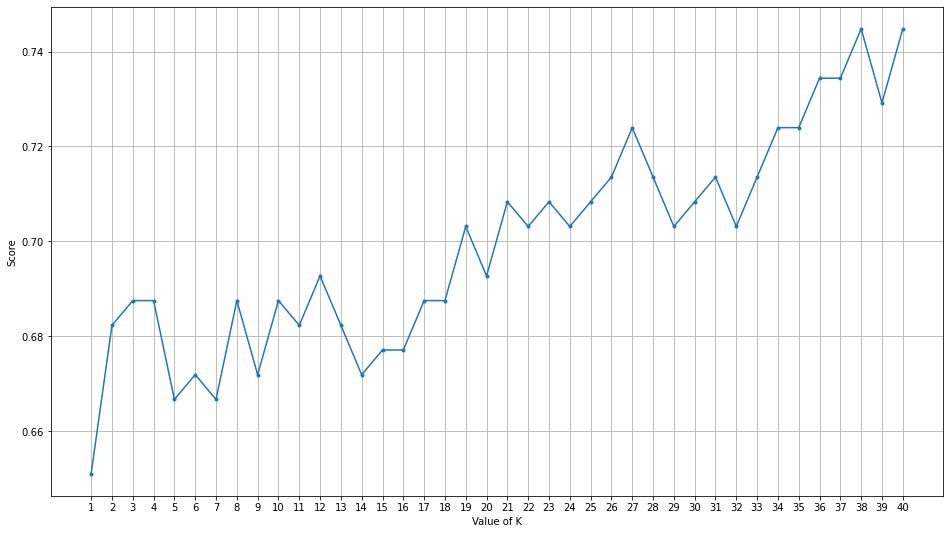

In [66]:
plt.figure(figsize=(16,9))
plt.xlabel("Value of K")
plt.ylabel("Score")
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41), score, marker='.')
 

In [71]:

k_max = score.index(max(score))
knn = KNeighborsClassifier(n_neighbors=k_max+1)
model = knn.fit(x_train,y_train) 

In [72]:
y_pred = knn.predict(x_test)

In [73]:
accuracy_score(y_test,y_pred)

0.7447916666666666

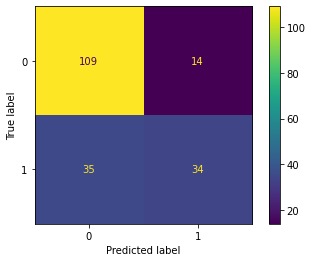

In [74]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       123
           1       0.71      0.49      0.58        69

    accuracy                           0.74       192
   macro avg       0.73      0.69      0.70       192
weighted avg       0.74      0.74      0.73       192

